<a href="https://colab.research.google.com/github/piyushhhhhh30/NITJ/blob/main/Practical_Exam_Code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install required packages

!pip install pandas plotly kaleido

# Import libraries
import pandas as pd
import plotly.graph_objects as go

# -------- STEP 1: Load Sample Data --------
# Sample data simulating your structure
super_profit = pd.DataFrame({
    "City": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"],
    "Profit": [120000, 85000, 65000, 70000, 45000]
})
coffee_profit = pd.DataFrame({
    "City": ["New York", "Los Angeles", "Chicago", "San Francisco", "Seattle"],
    "Profit": [50000, 40000, 30000, 45000, 35000]
})
coords_df = pd.DataFrame({
    "City": ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix", "San Francisco", "Seattle"],
    "Latitude": [40.7128, 34.0522, 41.8781, 29.7604, 33.4484, 37.7749, 47.6062],
    "Longitude": [-74.0060, -118.2437, -87.6298, -95.3698, -112.0740, -122.4194, -122.3321]
})

# -------- STEP 2: Merge profits with coordinates --------
super_merged = pd.merge(super_profit, coords_df, on="City", how="left")
coffee_merged = pd.merge(coffee_profit, coords_df, on="City", how="left")

# -------- STEP 3: Create the map figure --------
fig = go.Figure()

# SuperStore layer
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=super_merged['Longitude'],
    lat=super_merged['Latitude'],
    text=super_merged['City'] + ': $' + super_merged['Profit'].round(2).astype(str),
    marker=dict(
        size=super_merged['Profit'].abs() / 2000,
        color='blue',
        opacity=0.6,
        line=dict(width=0.5, color='black')
    ),
    name='SuperStore Profit'
))

# CoffeeChain layer
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=coffee_merged['Longitude'],
    lat=coffee_merged['Latitude'],
    text=coffee_merged['City'] + ': $' + coffee_merged['Profit'].round(2).astype(str),
    marker=dict(
        size=coffee_merged['Profit'].abs() / 2000,
        color='red',
        opacity=0.6,
        line=dict(width=0.5, color='black')
    ),
    name='CoffeeChain Profit'
))

# Layout settings
fig.update_layout(
    title='Total Profit by City (SuperStore & CoffeeChain)',
    geo=dict(scope='usa', projection=go.layout.geo.Projection(type='albers usa')),
    legend=dict(x=0.8, y=0.9)
)

# -------- STEP 4: Show and Save --------
fig.show()

# Save as image
fig.write_image("profit_map.png")
print("Map image saved as 'profit_map.png'")


Map image saved as 'profit_map.png'


<ipython-input-10-128ade513753>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




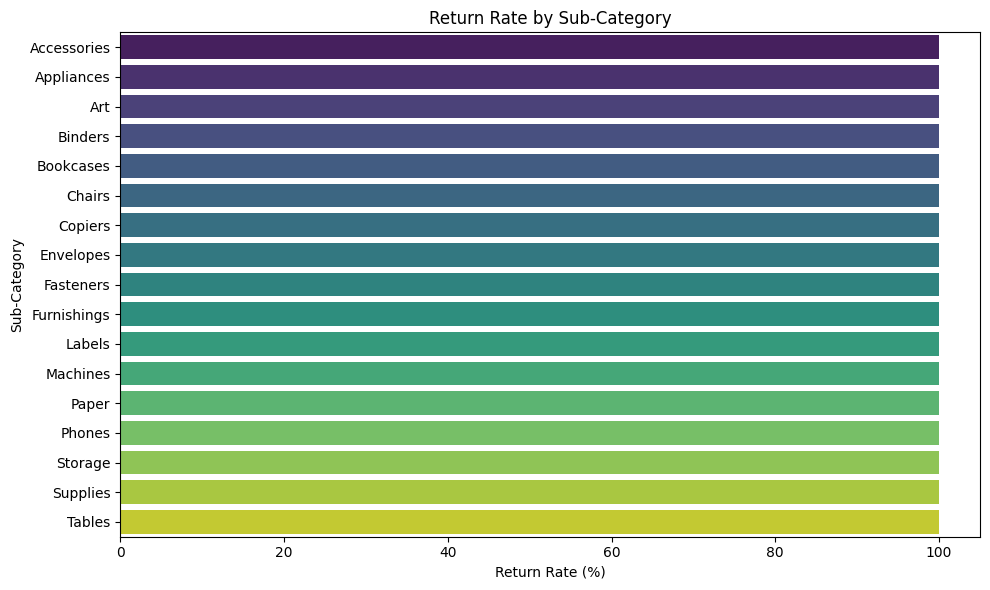

In [ ]:

# Step 2: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Step 3: Load the Uploaded CSV Files
orders = pd.read_excel("Sample - Superstore.xls")
returns = pd.read_excel("Sample - Superstore.xls")
# Step 4: Merge Datasets to Mark Returns
orders['Returned'] = orders['Order ID'].isin(returns['Order ID'])
# Step 5: Group by Sub-Category and Calculate Return Stats
summary = orders.groupby('Sub-Category').agg(
    total_orders=('Order ID', 'count'),
    returned_orders=('Returned', 'sum')
).reset_index()

summary['Return Rate (%)'] = (summary['returned_orders'] / summary['total_orders']) * 100
summary.sort_values('Return Rate (%)', ascending=False, inplace=True)
# Step 6: Plot the Return Rate by Sub-Category
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, y='Sub-Category', x='Return Rate (%)', palette='viridis')
plt.title('Return Rate by Sub-Category')
plt.xlabel('Return Rate (%)')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()


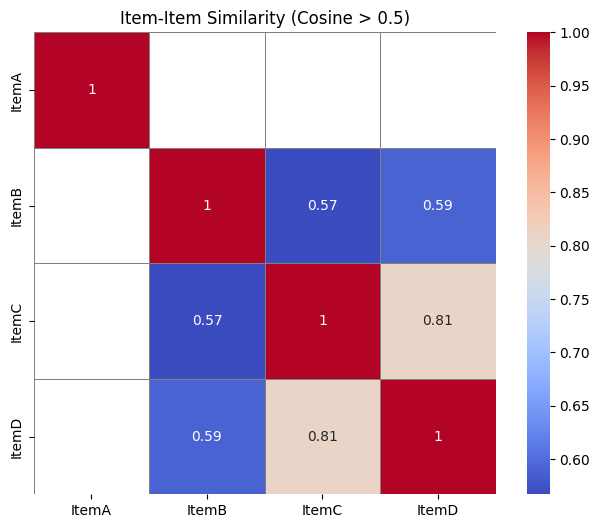

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Sample User-Item Rating Matrix
ratings = pd.DataFrame({
    'ItemA': [5, 4, np.nan, 1],
    'ItemB': [3, np.nan, 4, 2],
    'ItemC': [1, 2, 1, 5],
    'ItemD': [np.nan, 5, 4, 4]
}, index=['User1', 'User2', 'User3', 'User4'])

# Step 2: Fill missing ratings (zero-fill or mean-fill)
ratings_filled = ratings.fillna(0)

# Step 3: Transpose — Items as rows
item_matrix = ratings_filled.T

# Step 4: Compute cosine similarity between items
similarity_matrix = cosine_similarity(item_matrix)

# Step 5: Create DataFrame
items = item_matrix.index
similarity_df = pd.DataFrame(similarity_matrix, index=items, columns=items)

# Step 6: Apply threshold filter (> 0.5)
threshold = 0.5
filtered_df = similarity_df.where(similarity_df > threshold)

# Step 7: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_df, annot=True, cmap='coolwarm', square=True, linewidths=0.5, linecolor='gray')
plt.title("Item-Item Similarity (Cosine > 0.5)")
plt.show()